In [1]:
import quanguru as qg
import numpy as np
import matplotlib.pyplot as plt
import platform

# 10 - Single parameter sweep

In the previous tutorial, we covered the simulation of a single qubit with the `compute` function.
But, we run the simulation only for a single set of parameters, and, in most cases, we actually want to run the simulation for various different value of a parameter, say the qubit frequency.
QuanGuru already provides this functionality, and it is the purpose of this tutorial to show how do we create/define a sweep.
As you will see below, we don't need to change any part of the existing single parameter simulation, but we simply add a sweep.

Again, here, we will evolve the qubit under the unitary dynamics of its Hamiltonian $H=\frac{1}{2}f_{z}\sigma_{z} = f_{z}J_{z}$ with the initial state set to the equal superposition of $|1\rangle$ and $|0\rangle$.
We also set the total simulation time (with `simTotalTime`) and the step size (`simStepSize`) as well as the `compute` function where we compute the expectation value of $\sigma_{x}$.

In [2]:
# create the qubit and set its initial state and frequency
qub = qg.Qubit(frequency = 1)
qub.initialState = [0, 1]

# set the simulation time and step size
qub.simTotalTime = 8*np.pi
qub.simStepSize = 0.1

# create the operators for which we compute the expectation values
sigmaX = qg.sigmax()

# write a compute function that takes two arguments: (i) a quantum-system (qsys) and (ii) a state
# compute whatever we want and store in .resultsDict
def compute(qsys, state):
    qsys.resultsDict['sigmax expectation'].append(qg.expectation(sigmaX, state))

# set the compute attribute of our qubit to compute function
qub.compute = compute

Now, the only thing needed is to add a `Sweep`.
We do this by calling the `.simulation.Sweep.createSweep` on our qubit object and passing the relevant arguments.
This rather lengthy and strange notation (`.simulation.Sweep.createSweep`) will become clearer in later tutorials, but, for now, we can intuitively read it as "create a new sweep (`createSweep`) among existing sweeps (`Sweep`) for the simulation (`simulation`) of our qubit (`qub`).
This means that we can also carry multi-parameter sweep, which will be covered in later tutorials.

Every new sweep requires a system (the qubit `qub`), a string for the attribute to be swept (qubit frequency `"frequency"`), and a list values to be swept (`sweepList` or other alternatives covered in later tutorials).
Since, we can modify the frequency, operator, and/or order of the first term through the `QuantumSystem` objects, we simply use the `qub` as the system for the below sweep.
However, we need to use the term object itself as the system when we want to sweep any parameter of the other terms in the Hamiltonian (covered in later tutorials).

In [3]:
freqSweep = qub.simulation.Sweep.createSweep(system=qub, sweepKey="frequency", sweepList=np.arange(-1, 1, 0.02))

At this point, all the essential information are set, and we can run the simulation by `qub.runSimulation()`.
Since, the `compute` function will compute all the quantities we are interested, we again set `simDelState` to `True`.

Also, for parameter sweeps, QuanGuru can carry out parallel-processing, which means that each simulation for a set of parameters will run on the different cores of your cpu. For this, we simply set `p=True` when we call the `runSimulation`.

<span style="color:red" font-weight="bold"> IMPORTANT NOTE FOR WINDOWS USERS : MULTI-PROCESSING (p=True) DOES NOT WORK WITH NOTEBOOK

You can use a python script, but you will need to make sure that the critical parts of the code are under ``` if __name__ == "__main__": ``` We are going to add further tutorials for this later.

In [4]:
qub.simDelStates = True
states = qub.runSimulation(p=(platform.system() != 'Windows'))

Now, we receive the `results` that we stored again as `qub.resultsDict['sigmax expectation']`, but this time it returns a list of list, each of which is a time trace corresponding to the frequencies swept.

As expected, the expectation value of $\sigma_{x}$ oscillates with different frequencies.

Text(0, 0.5, 'Time')

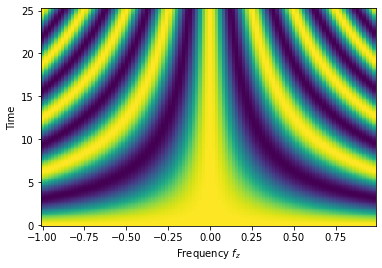

In [5]:
Y, X = np.meshgrid(qub.simulation.timeList, freqSweep.sweepList)
plt.pcolormesh(X, Y, qub.resultsDict['sigmax expectation'])

plt.xlabel("Frequency $f_{z}$")
plt.ylabel("Time")